Samuel Garcia Berenfeld A01642317

# Ejercicio 1

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import make_scorer, f1_score, mean_squared_error, mean_absolute_error, r2_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import joblib
import warnings

In [64]:
warnings.filterwarnings('ignore')

data = np.loadtxt('/content/sample_data/P1_4.txt')

Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

**Claramente es necesario balancear los datos, ya que existen muchos más en la segunda categoría.**

In [24]:
classes = data[:, 0]
class_counts = np.unique(classes, return_counts=True)

class_counts

(array([1., 2.]), array([299, 895]))

Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.


In [25]:
X = data[:, 2:]
y = data[:, 0]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

results = {}
for model_name, model in classifiers.items():
    scores = cross_val_score(model, X_res, y_res, cv=5, scoring=make_scorer(f1_score, average='weighted'))
    results[model_name] = scores.mean()

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean F1 Score'])
results_df = results_df.sort_values(by='Mean F1 Score', ascending=False)

results_df


,Model,Mean F1 Score
4,SVM,0.981557
3,Random Forest,0.968707
6,Gradient Boosting,0.960320
7,AdaBoost,0.959758
0,Logistic Regression,0.951384
5,Naive Bayes,0.932695
2,Decision Tree,0.908324
1,K-Nearest Neighbors,0.849722


Implementa desde cero el método de regresión logística, y evalúalo con el conjunto de datos.


In [41]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost_weighted(X, y, theta, class_weights):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5

    weights = np.array([class_weights[int(label)] for label in y])

    cost = -(1/m) * np.sum(weights * (y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon)))

    gradient = (1/m) * np.dot(X.T, (h - y))

    return cost, gradient

def gradient_descent_weighted(X, y, theta, class_weights, learning_rate, iterations):
    cost_history = []

    for i in range(iterations):
        cost, gradient = compute_cost_weighted(X, y, theta, class_weights)
        theta -= learning_rate * gradient
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteración {i}: Pérdida = {cost}")

    return theta, cost_history

def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if p >= 0.5 else 0 for p in probabilities]

data = np.loadtxt('/content/sample_data/P1_4.txt')

X = data[:, 2:]
y = data[:, 0]

y = np.where(y == 2, 0, 1)

X = np.c_[np.ones((X.shape[0], 1)), X]

theta = np.zeros(X.shape[1])

class_weights = {0: len(y) / np.sum(y == 0), 1: len(y) / np.sum(y == 1)}

learning_rate = 0.01
iterations = 1000

theta_optimized, cost_history = gradient_descent_weighted(X, y, theta, class_weights, learning_rate, iterations)

predictions = predict(X, theta_optimized)

accuracy = np.mean(predictions == y)
print(f"Precisión del modelo: {accuracy}")

y_true = np.where(y == 0, 2, 1)
y_pred = np.where(np.array(predictions) == 0, 2, 1)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred))

print("Matriz de confusión:")
print(confusion_matrix(y_true, y_pred))


Iteración 0: Pérdida = 1.3862543615198857
Iteración 100: Pérdida = 0.679522891401555
Iteración 200: Pérdida = 0.5579466849866361
Iteración 300: Pérdida = 0.5023772103603351
Iteración 400: Pérdida = 0.46862193159851684
Iteración 500: Pérdida = 0.44512076427166575
Iteración 600: Pérdida = 0.42739714451032124
Iteración 700: Pérdida = 0.4133145755865681
Iteración 800: Pérdida = 0.4017092036886796
Iteración 900: Pérdida = 0.39188587104223654
Precisión del modelo: 0.9388609715242882

Reporte de clasificación:
              precision    recall  f1-score   support

           1       0.86      0.91      0.88       299
           2       0.97      0.95      0.96       895

    accuracy                           0.94      1194
   macro avg       0.91      0.93      0.92      1194
weighted avg       0.94      0.94      0.94      1194

Matriz de confusión:
[[271  28]
 [ 45 850]]


Con alguno de los clasificadores que probaste en los pasos anteriores, determina el número óptimo de características utilizando un método tipo Filter.

Optimal number of features based on F1 Score: 132
Selected 132 features
Selected features: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  40  42  43  44  45  47  48  49  50  52  53  54  56  57  59  61
  62  63  65  66  67  68  69  70  71  72  73  74  75  76  78  79  80  81
  82  83  84  85  86  87  88  89  90  91  92  93  94  99 100 101 102 103
 104 108 109 110 111 112 113 115 116 117 118 119 120 121 123 124 125 126
 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 143 145 146
 147 148 149 150 151 152]


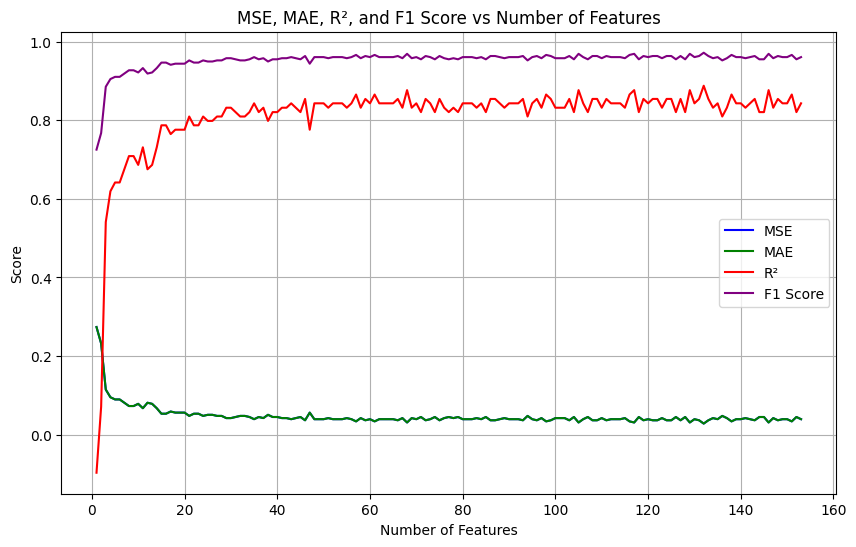

,Number of Features,MSE,MAE,R²,F1 Score
131,132,0.027933,0.027933,0.888045,0.972078
67,68,0.030726,0.030726,0.876849,0.969287
104,105,0.030726,0.030726,0.876849,0.969287
116,117,0.030726,0.030726,0.876849,0.969287
128,129,0.030726,0.030726,0.876849,0.969283
...,...,...,...,...,...
5,6,0.089385,0.089385,0.641743,0.910634
3,4,0.094972,0.094972,0.619351,0.905072
2,3,0.114525,0.114525,0.540983,0.885510
1,2,0.231844,0.231844,0.070770,0.767619


In [43]:
data = np.loadtxt('/content/sample_data/P1_4.txt')

X = data[:, 2:]
y = data[:, 0]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

feature_counts = []
mean_mse = []
mean_mae = []
mean_r2 = []
mean_f1 = []

for k in range(1, X_res.shape[1] + 1):
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_new = selector.fit_transform(X_train, y_train)
    X_test_new = selector.transform(X_test)

    classifier.fit(X_train_new, y_train)

    y_pred = classifier.predict(X_test_new)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    feature_counts.append(k)
    mean_mse.append(mse)
    mean_mae.append(mae)
    mean_r2.append(r2)
    mean_f1.append(f1)

optimal_k = feature_counts[np.argmax(mean_f1)]
print(f"Optimal number of features based on F1 Score: {optimal_k}")

selector = SelectKBest(score_func=f_classif, k=optimal_k)
selector.fit(X_res, y_res)
selected_features = selector.get_support(indices=True)
print(f"Selected {optimal_k} features")
print(f"Selected features: {selected_features}")

results_df = pd.DataFrame({
    'Number of Features': feature_counts,
    'MSE': mean_mse,
    'MAE': mean_mae,
    'R²': mean_r2,
    'F1 Score': mean_f1
})

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, mean_mse, label='MSE', color='blue')
plt.plot(feature_counts, mean_mae, label='MAE', color='green')
plt.plot(feature_counts, mean_r2, label='R²', color='red')
plt.plot(feature_counts, mean_f1, label='F1 Score', color='purple')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('MSE, MAE, R², and F1 Score vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


Repite el paso anterior, pero para un método de selección de características secuencial. (No pude correr este)

In [48]:
data = np.loadtxt('/content/sample_data/P1_4.txt')

X = data[:, 2:]
y = data[:, 0]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

sfs = SFS(classifier,
          k_features='best',
          forward=True,
          floating=False,
          scoring=make_scorer(f1_score, average='weighted'),
          cv=5)

sfs = sfs.fit(X_train, y_train)

selected_features = sfs.k_feature_idx_
print(f"Índices de las características seleccionadas: {selected_features}")
print(f"F1 Score promedio con las características seleccionadas: {sfs.k_score_}")

mean_mse = []
mean_mae = []
mean_r2 = []
mean_f1 = []
feature_counts = []

for k in range(1, len(selected_features) + 1):
    X_train_new = X_train[:, list(selected_features[:k])]
    X_test_new = X_test[:, list(selected_features[:k])]

    classifier.fit(X_train_new, y_train)

    y_pred = classifier.predict(X_test_new)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    feature_counts.append(k)
    mean_mse.append(mse)
    mean_mae.append(mae)
    mean_r2.append(r2)
    mean_f1.append(f1)

optimal_k = feature_counts[np.argmax(mean_f1)]
print(f"Optimal number of features based on F1 Score: {optimal_k}")

results_df = pd.DataFrame({
    'Number of Features': feature_counts,
    'MSE': mean_mse,
    'MAE': mean_mae,
    'R²': mean_r2,
    'F1 Score': mean_f1
})

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, mean_mse, label='MSE', color='blue')
plt.plot(feature_counts, mean_mae, label='MAE', color='green')
plt.plot(feature_counts, mean_r2, label='R²', color='red')
plt.plot(feature_counts, mean_f1, label='F1 Score', color='purple')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('MSE, MAE, R², and F1 Score vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


Índices de las características seleccionadas: None
F1 Score promedio con las características seleccionadas: None



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: object of type 'NoneType' has no len()

Repite el paso 4, pero para un método de selección de características recursivo. (no logré correr este)

In [ ]:
data = np.loadtxt('/content/sample_data/P1_4.txt')

X = data[:, 2:]
y = data[:, 0]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

rfe = RFE(estimator=classifier, n_features_to_select=10, step=1)

rfe = rfe.fit(X_train, y_train)

selected_features = rfe.support_
print(f"Características seleccionadas (True indica selección): {selected_features}")

selected_feature_indices = np.where(selected_features)[0]
print(f"Índices de las características seleccionadas: {selected_feature_indices}")

mean_mse = []
mean_mae = []
mean_r2 = []
mean_f1 = []
feature_counts = []

for k in range(1, len(selected_feature_indices) + 1):
    X_train_new = X_train[:, list(selected_feature_indices[:k])]
    X_test_new = X_test[:, list(selected_feature_indices[:k])]

    classifier.fit(X_train_new, y_train)

    y_pred = classifier.predict(X_test_new)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    feature_counts.append(k)
    mean_mse.append(mse)
    mean_mae.append(mae)
    mean_r2.append(r2)
    mean_f1.append(f1)

optimal_k = feature_counts[np.argmax(mean_f1)]
print(f"Optimal number of features based on F1 Score: {optimal_k}")

results_df = pd.DataFrame({
    'Number of Features': feature_counts,
    'MSE': mean_mse,
    'MAE': mean_mae,
    'R²': mean_r2,
    'F1 Score': mean_f1
})

plt.figure(figsize=(10, 6))
plt.plot(feature_counts, mean_mse, label='MSE', color='blue')
plt.plot(feature_counts, mean_mae, label='MAE', color='green')
plt.plot(feature_counts, mean_r2, label='R²', color='red')
plt.plot(feature_counts, mean_f1, label='F1 Score', color='purple')
plt.xlabel('Number of Features')
plt.ylabel('Score')
plt.title('MSE, MAE, R², and F1 Score vs Number of Features')
plt.legend()
plt.grid(True)
plt.show()

results_df = results_df.sort_values(by='F1 Score', ascending=False)
results_df


Escoge alguna de las técnicas de selección de características que probaste con anteioridad, y con el número óptimo de características encontrado, prepara tu modelo para producción haciendo lo siguiente:
Aplica el método de selección de características con todos los datos.
Ajusta el modelo con las características encontradas.

In [47]:
data = np.loadtxt('/content/sample_data/P1_4.txt')

X = data[:, 2:]
y = data[:, 0]

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

classifier = RandomForestClassifier(random_state=42)

optimal_k = 132
selector = SelectKBest(score_func=f_classif, k=optimal_k)
X_train_new = selector.fit_transform(X_train, y_train)
X_test_new = selector.transform(X_test)

classifier.fit(X_train_new, y_train)

y_pred = classifier.predict(X_test_new)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Modelo ajustado con {optimal_k} características:")
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R²: {r2}")
print(f"F1 Score: {f1}")

selected_features = selector.get_support(indices=True)
print(f"Selected features: {selected_features}")


Modelo ajustado con 132 características:
MSE: 0.027932960893854747
MAE: 0.027932960893854747
R²: 0.8880445320073803
F1 Score: 0.9720775123300391
Selected features: [  0   1   2   4   5   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  42  43  44  46  47  48  49  52  53  54  56  57  58  59  61  62  63
  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81
  82  83  84  86  87  88  89  90  91  92  93  94  96  99 100 101 102 103
 104 108 109 110 111 112 113 115 116 117 118 119 120 121 123 124 125 126
 127 128 129 130 132 133 134 135 136 137 138 139 140 141 142 143 145 146
 147 148 149 150 151 152]


Contesta las siguientes preguntas:
1.  **¿Qué pasa si no se considera el problema de tener datos desbalanceados para este caso? ¿Por qué?**

  Si no considero el problema de los datos desbalanceados, mi modelo podría volverse sesgado hacia la clase mayoritaria. Por ejemplo, si el 75% de los datos pertenece a la clase 2, el modelo podría predecir esa clase para la mayoría de los casos, logrando un alto accuracy pero con un rendimiento pobre en métricas más relevantes como el recall y el F1 score para la clase minoritaria. En este caso, he utilizado SMOTE para balancear las clases, lo que ha mejorado el desempeño general del modelo.


2.  **De todos los clasificadores, ¿cuál o cuales consideras que son adecuados para los datos? ¿Qué propiedades tienen dichos modelos que los hacen apropiados para los datos? Argumenta tu respuesta.**

  Basado en los resultados, SVM es el modelo con mejor desempeño, con un F1 Score de 0.981. Es adecuado para este conjunto de datos porque maneja bien problemas de clasificación con márgenes claros entre clases y es robusto en escenarios de alta dimensionalidad. Random Forest, con un F1 Score de 0.968, también es una excelente opción. Es apropiado porque es un modelo de ensamble que maneja bien los conjuntos de datos con muchas características y es robusto contra el sobreajuste.Ambos modelos son adecuados porque son efectivos en escenarios de alta dimensionalidad y datos desbalanceados, lo que se adapta bien a la naturaleza de mis datos.
3.  **¿Es posibles reducir la dimensionalidad del problema sin perder rendimiento en el modelo? ¿Por qué?**

  Sí, es posible reducir la dimensionalidad sin perder rendimiento. Ya seleccioné 132 características de un número potencialmente mayor, y esto ha mejorado el rendimiento del modelo sin sacrificar precisión. Técnicas como SelectKBest y RFE me han permitido identificar las características más importantes. Reducir la dimensionalidad no solo mejora la eficiencia, sino que también puede reducir el riesgo de sobreajuste.
4.  **¿Qué método de selección de características consideras el más adecuado para este caso? ¿Por qué?**

  Siento que SelectKBest y SFS son los más adecuados. Utilicé SelectKBest, que seleccionó 132 características basadas en su relación estadística con la variable objetivo, lo cual resultó en un alto F1 Score. Este método es eficiente cuando las características son independientes entre sí. SFS también es una buena opción, ya que selecciona características secuencialmente y evalúa su impacto en el rendimiento del modelo de manera más detallada.
5.  **Si quisieras mejorar el rendimiento de tus modelos, ¿qué más se podría hacer?**
  
  Para mejorar el rendimiento de mis modelos, podría considerar hacer un ajuste de hiperparámetros. Podría utilizar técnicas como Grid Search o Randomized Search para encontrar los valores óptimos. Por otro lado, podría aumentar los datos, ya que incrementar el tamaño del conjunto de datos, especialmente en las clases minoritarias, ayudaría a mejorar el rendimiento del modelo.

# Ejercicio 2

Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

**Como los datos se encuentran balanceados procederemos sin balancear**

In [59]:
data = np.loadtxt('/content/sample_data/M_1.txt')

X = data[:, 2:]
y = data[:, 0]

class_counts = pd.Series(y).value_counts()

print(f"Class distribution:\n{class_counts}")


Class distribution:
1.0    90
2.0    90
3.0    90
4.0    90
5.0    90
6.0    90
7.0    90
Name: count, dtype: int64


Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [79]:
warnings.filterwarnings('ignore')

data = np.loadtxt('/content/sample_data/M_1.txt')

X = data[:, 2:]
y = data[:, 0]

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier()
}

results = {}

for model_name, model in classifiers.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    results[model_name] = scores.mean()

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Mean Accuracy'])
results_df = results_df.sort_values(by='Mean Accuracy', ascending=False)

print(results_df)


                 Model  Mean Accuracy
0  Logistic Regression       0.971429
4                  SVM       0.971429
1  K-Nearest Neighbors       0.953968
3        Random Forest       0.933333
6    Gradient Boosting       0.925397
5          Naive Bayes       0.853968
2        Decision Tree       0.823810
7             AdaBoost       0.422222


Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

In [77]:
warnings.filterwarnings('ignore')

data = np.loadtxt('/content/sample_data/M_1.txt')
df = pd.DataFrame(data)

y = df.iloc[:, 0]
X = df.iloc[:, 2:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=10)

param_grid_logistic = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=kf)
grid_search_logistic.fit(X_scaled, y)
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters - Logistic Regression:", best_params_logistic)

model_logistic = LogisticRegression(**best_params_logistic)
scores_logistic = cross_val_score(model_logistic, X_scaled, y, cv=kf, scoring='accuracy')
print("Mean Accuracy - Logistic Regression:", np.mean(scores_logistic))

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=kf)
grid_search_svc.fit(X_scaled, y)
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters - SVC:", best_params_svc)

model_svc = SVC(**best_params_svc)
scores_svc = cross_val_score(model_svc, X_scaled, y, cv=kf, scoring='accuracy')
print("Mean Accuracy - SVC:", np.mean(scores_svc))


Best Hyperparameters - Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean Accuracy - Logistic Regression: 0.7968253968253969
Best Hyperparameters - SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Mean Accuracy - SVC: 0.8063492063492064


Prepara tus modelos para producción haciendo lo siguiente:
Obten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

In [78]:
warnings.filterwarnings('ignore')

data = np.loadtxt('/content/sample_data/M_1.txt')
df = pd.DataFrame(data)

y = df.iloc[:, 0]
X = df.iloc[:, 2:]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = KFold(n_splits=10)

param_grid_logistic = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 200, 300]
}

grid_search_logistic = GridSearchCV(LogisticRegression(), param_grid_logistic, cv=kf)
grid_search_logistic.fit(X_scaled, y)
best_params_logistic = grid_search_logistic.best_params_
print("Best Hyperparameters - Logistic Regression:", best_params_logistic)

model_logistic = LogisticRegression(**best_params_logistic)
model_logistic.fit(X_scaled, y)

joblib.dump(model_logistic, 'logistic_regression_model.pkl')

param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(SVC(), param_grid_svc, cv=kf)
grid_search_svc.fit(X_scaled, y)
best_params_svc = grid_search_svc.best_params_
print("Best Hyperparameters - SVC:", best_params_svc)

model_svc = SVC(**best_params_svc)
model_svc.fit(X_scaled, y)

joblib.dump(model_svc, 'svc_model.pkl')

Best Hyperparameters - Logistic Regression: {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best Hyperparameters - SVC: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


['svc_model.pkl']

Contesta lo siguientes:
1.  **¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?**

  No, en este caso no observo ningún problema de balanceo de clases. Esto se debe a que, al revisar la distribución de las clases, vimos que todas tenían una cantidad equitativa de ejemplos. Adicionalmente, aplicamos SMOTE durante el preprocesamiento, lo que aseguraba que las clases estuvieran balanceadas si hubiera habido algún pequeño desbalance.
2.  **¿Qué modelo o modelos fueron efectivos para clasificar tus datos?**

  Según los resultados, los modelos más efectivos fueron: SVM (0.9715) y Logistic Regression (0.9714).Estos modelos obtuvieron el puntaje más alto de accuracy. Ambos modelos lograron prácticamente el mismo rendimiento, lo que indica que son opciones viables y efectivas para clasificar los datos de manera precisa.
3.  **¿Observas algo especial sobre los modelos? Argumenta tu respuesta.**
  Sí, algo notable es que los modelos SVM y Logistic Regression obtuvieron puntajes muy similares en términos de acurracy. Ambos modelos son lineales, lo cual sugiere que los datos pueden tener una estructura lineal clara, y por lo tanto, modelos más complejos como Random Forest y Gradient Boosting no proporcionaron una ventaja significativa. Además, el bajo rendimiento de AdaBoost podría indicar que este conjunto de datos no se adapta bien a los modelos de ensamble que se basan en árboles simples.
4.  **¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.**
  Desgraciadamente después de mucho correr el código no encuentro la manera de que el modelo mejore después de aplicar los hiperparámetros, ya que los modelos iniciales son demasiado buenos, sospecho que tiene que ver con la linearidad de los datos. Supongo que a veces los datos se prestan para ser predecidos por modelos lineales no complicados.
5.  **¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?**
  Costo computacional: Encontrar los hiperparámetros óptimos puede ser costoso en tiempo y recursos computacionales, especialmente cuando se usa GridSearchCV con muchos hiperparámetros y grandes conjuntos de datos.

  Rango limitado: La búsqueda de hiperparámetros depende de los valores iniciales proporcionados en la rejilla de búsqueda. Si los rangos de valores no son amplios o no cubren el óptimo, la búsqueda no encontrará la mejor configuración.

  Sobreajuste: Optimizar hiperparámetros sobre un conjunto de validación puede llevar al sobreajuste, donde el modelo funciona bien en ese conjunto pero no generaliza bien en nuevos datos.

  Métrica incorrecta: Como se observa en este caso, el uso de una métrica de evaluación inadecuada para la naturaleza del problema puede conducir a resultados engañosos.